# 선형회귀 (Linear Regression)

정의: 통계학에서 선형 회귀(linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법
- “**연속형“** 두 변수 간의 관계를 분석한다.
- 무언가를 “**예측**” 하려고 사용

- 변수 x의 값은 독립적으로 변할 수 있는 것에 반해, y값은 계속해서 x의 값에 의해서, 종속적으로 결정되므로 x를 독립 변수, y를 종속 변수
- 선형 회귀는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다. 
- 만약, 독립 변수 x가 1개라면 단순 선형 회귀!

# 단순 선형 회귀 (Simple Linear Regression)
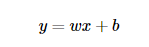

 여기서 독립 변수 x와 곱해지는 값 w를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)이라고 한다
 ## 가설
  
> x와 y의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 가설(Hypothesis)이라고 함<br>
 선형 회귀는 주어진 데이터로부터 x와 y의 관계를 가장 잘 나타내는 직선을 그리는 일을 말합니다. <br>
 그리고 어떤 직선인지 결정하는 것은 w와 b의 값이므로 선형 회귀에서 해야할 일은 결국 적절한 w와 b를 찾아내는 일!
 
 ##  평균 제곱 오차(Mean Squared Error, MSE)
 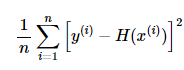
 > 모형을 통해 추정된 값(predict)과 실측값(ground truth) 의 차에 대한 제곱합의 평균<br> 이 값이 크면 모형의 예측력이 떨어짐을 의미하고, 이 값이 작을수록 모형이 더 정확한 예측을 한다는 것을 알 수 있다.<br>
  평균 최소 오차. 즉, cost(w,b)를 최소가 되게 만드는 w와 b를 구하면 결과적으로 x와 y의 관계를 가장 잘 나타내는 직선이 될것임
  
  ## optimizer  (최적화 알고리즘)
  > 옵티마이저 알고리즘 중 가장 기본적인 것으로는 경사 하강법(Gradient Descent)이 있다<br>
   PyTorch에서 입력을 x, 출력을 y, 그리고 b=0이라고 가정해보고 보면 <br>
   cost(w,b)값이 최소가 되어야하므로, 비용 함수(Cost function)를 미분하여 w에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 w의 값을 변경하는 작업을 반복해야한다.
   <br> 이를 예시 코드로 구현하면 아래와 같다


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#_train, y_train 모델을 학습시키기 위한 데이터로->  파이토치의 텐서의 형태(torch.tensor)로 선언해준뒤 학습을 한다
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

     # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

예상한 대로 W=2로 접근하고 cost작아지는 것 확인 가능


# 다중 선형 회귀 (Multiple Linear Regression)
 
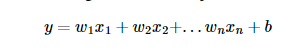
y는 여전히 1개이지만 이제 x는 1개가 아니라 여러 개 -> 이를 다중 선형 회귀 분석이라고 한다.
- 문제점 증가
- 설명 변수의 정보 중첩으로 발생하는 다중공선성(multicollinearity) 문제
- 너무 많은 설명 변수를 포함해 발생하는 차원의 저주 문제